# Import Library

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cross_decomposition import CCA
from matplotlib.cm import get_cmap
from sklearn.preprocessing import StandardScaler

# Import Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/PROJECT/Transek3.csv')
df

,Lokasi,sh,sl,pH,DO,DC,HC,DCA,S,Si,...,Oc,Cn,Oe,Opi,Oi,Op,Ac,Ml,Os,Of
0,BL3,29.5,34,7.00,7.07,0.48,7.71,8.29,32.48,1.33,...,4,0,0,0,0,0,0,0,0,0
1,TP3,29.0,34,7.44,7.38,0.26,11.79,23.72,16.92,0.00,...,2,2,8,10,0,4,2,0,3,1
2,KS3,33.9,34,7.40,7.48,4.00,7.50,5.17,13.67,0.00,...,3,0,0,0,2,2,0,6,0,0
3,TPA3,31.0,34,7.31,7.40,7.78,5.56,25.56,33.61,0.00,...,1,0,0,0,0,2,2,0,0,0
4,P3,31.1,33,7.30,7.47,9.33,29.44,21.56,17.56,1.78,...,4,0,0,0,0,6,0,0,6,0


In [ ]:
locations = ['BL3', 'TP3', 'KS3', 'TPA3', 'P3']
species = ['Oc','Cn','Oe','Opi','Oi','Op','Ac','Ml','Os','Of']

df_encoded = pd.get_dummies(df, columns=['Lokasi'])

parameters = ['sh', 'sl', 'pH', 'DO', 'DC', 'HC', 'DCA', 'S', 'Si', 'Rk', 'R']
df_encoded

,sh,sl,pH,DO,DC,HC,DCA,S,Si,Rk,...,Op,Ac,Ml,Os,Of,Lokasi_BL3,Lokasi_KS3,Lokasi_P3,Lokasi_TP3,Lokasi_TPA3
0,29.5,34,7.00,7.07,0.48,7.71,8.29,32.48,1.33,0.00,...,0,0,0,0,0,True,False,False,False,False
1,29.0,34,7.44,7.38,0.26,11.79,23.72,16.92,0.00,0.00,...,4,2,0,3,1,False,False,False,True,False
2,33.9,34,7.40,7.48,4.00,7.50,5.17,13.67,0.00,0.67,...,2,0,6,0,0,False,True,False,False,False
3,31.0,34,7.31,7.40,7.78,5.56,25.56,33.61,0.00,0.00,...,2,2,0,0,0,False,False,False,False,True
4,31.1,33,7.30,7.47,9.33,29.44,21.56,17.56,1.78,0.00,...,6,0,0,6,0,False,False,True,False,False


In [ ]:
df_encoded.drop('%Or', axis=1, inplace=True)
df_encoded

,sh,sl,pH,DO,DC,HC,DCA,S,Si,Rk,...,Op,Ac,Ml,Os,Of,Lokasi_BL3,Lokasi_KS3,Lokasi_P3,Lokasi_TP3,Lokasi_TPA3
0,29.5,34,7.00,7.07,0.48,7.71,8.29,32.48,1.33,0.00,...,0,0,0,0,0,True,False,False,False,False
1,29.0,34,7.44,7.38,0.26,11.79,23.72,16.92,0.00,0.00,...,4,2,0,3,1,False,False,False,True,False
2,33.9,34,7.40,7.48,4.00,7.50,5.17,13.67,0.00,0.67,...,2,0,6,0,0,False,True,False,False,False
3,31.0,34,7.31,7.40,7.78,5.56,25.56,33.61,0.00,0.00,...,2,2,0,0,0,False,False,False,False,True
4,31.1,33,7.30,7.47,9.33,29.44,21.56,17.56,1.78,0.00,...,6,0,0,6,0,False,False,True,False,False


# Data Modelling & Visualization

## Normalisasi Data dengan Standard Scaler

In [ ]:
list_loc = ['Lokasi_BL3',	'Lokasi_KS3',	'Lokasi_P3',	'Lokasi_TP3',	'Lokasi_TPA3']
df_loc = df_encoded[list_loc]

df_params = df_encoded[parameters]
df_params

,sh,sl,pH,DO,DC,HC,DCA,S,Si,Rk,R
0,29.5,34,7.00,7.07,0.48,7.71,8.29,32.48,1.33,0.00,43.81
1,29.0,34,7.44,7.38,0.26,11.79,23.72,16.92,0.00,0.00,45.00
2,33.9,34,7.40,7.48,4.00,7.50,5.17,13.67,0.00,0.67,68.83
3,31.0,34,7.31,7.40,7.78,5.56,25.56,33.61,0.00,0.00,27.22
4,31.1,33,7.30,7.47,9.33,29.44,21.56,17.56,1.78,0.00,29.11


In [ ]:
df_species = df_encoded.drop(parameters + list_loc, axis=1)
df_species

,Oc,Cn,Oe,Opi,Oi,Op,Ac,Ml,Os,Of
0,4,0,0,0,0,0,0,0,0,0
1,2,2,8,10,0,4,2,0,3,1
2,3,0,0,0,2,2,0,6,0,0
3,1,0,0,0,0,2,2,0,0,0
4,4,0,0,0,0,6,0,0,6,0


In [ ]:
scaler = StandardScaler()
scaledfeatures = scaler.fit_transform(df_params)
df_feat = pd.DataFrame(scaledfeatures, columns=df_params.columns)
df_feat

,sh,sl,pH,DO,DC,HC,DCA,S,Si,Rk,R
0,-0.818727,0.5,-1.878213,-1.932475,-1.051806,-0.535502,-1.017157,1.141604,0.913586,-0.5,0.068080
1,-1.111130,0.5,0.971490,0.133274,-1.111291,-0.069649,0.814200,-0.702599,-0.802613,-0.5,0.147819
2,1.754416,0.5,0.712426,0.799645,-0.100043,-0.559479,-1.387464,-1.087795,-0.802613,2.0,1.744616
3,0.058481,0.5,0.129532,0.266548,0.922020,-0.780987,1.032586,1.275534,-0.802613,-0.5,-1.043580
4,0.116961,-2.0,0.064766,0.733008,1.341121,1.945618,0.557834,-0.626745,1.494255,-0.5,-0.916935


In [ ]:
df_final = pd.concat([df_feat, df_loc], axis=1)
df_final

,sh,sl,pH,DO,DC,HC,DCA,S,Si,Rk,R,Lokasi_BL3,Lokasi_KS3,Lokasi_P3,Lokasi_TP3,Lokasi_TPA3
0,-0.818727,0.5,-1.878213,-1.932475,-1.051806,-0.535502,-1.017157,1.141604,0.913586,-0.5,0.068080,True,False,False,False,False
1,-1.111130,0.5,0.971490,0.133274,-1.111291,-0.069649,0.814200,-0.702599,-0.802613,-0.5,0.147819,False,False,False,True,False
2,1.754416,0.5,0.712426,0.799645,-0.100043,-0.559479,-1.387464,-1.087795,-0.802613,2.0,1.744616,False,True,False,False,False
3,0.058481,0.5,0.129532,0.266548,0.922020,-0.780987,1.032586,1.275534,-0.802613,-0.5,-1.043580,False,False,False,False,True
4,0.116961,-2.0,0.064766,0.733008,1.341121,1.945618,0.557834,-0.626745,1.494255,-0.5,-0.916935,False,False,True,False,False


In [ ]:
X = df_feat.values
Y = df_species.values

## Modelling CCA

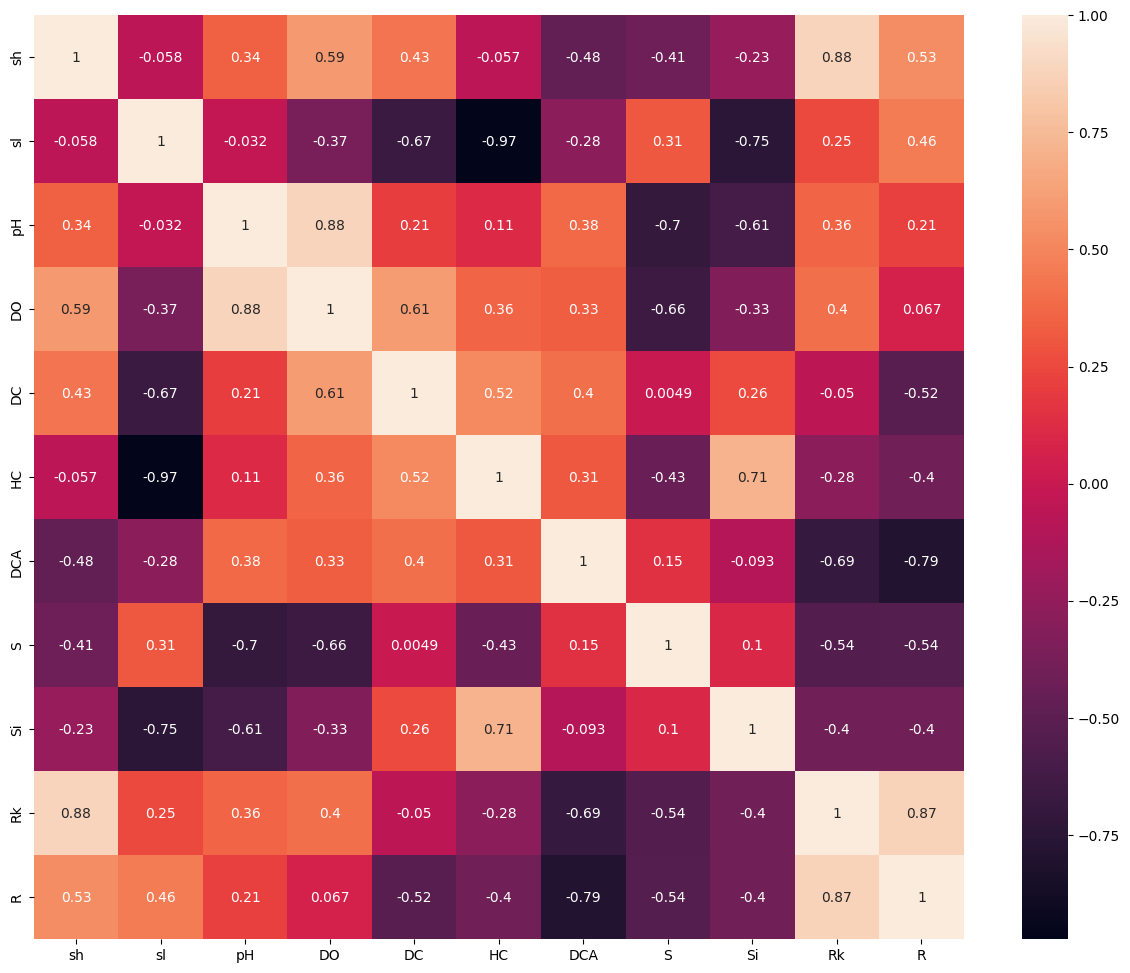

In [ ]:
corr = df_feat.corr()
plt.figure(figsize=(15,12))
sns.heatmap(corr, annot=True)

plt.show()

In [ ]:
cca = CCA(n_components=2)
cca.fit(X, Y)
X_c, Y_c = cca.transform(X, Y)

df['CCA1'] = X_c[:, 0]
df['CCA2'] = X_c[:, 1]

## Visualisasi Data

In [ ]:
color_map = get_cmap('tab20')
colors = color_map.colors

<ipython-input-13-f55fae0db150>:1: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_map = get_cmap('tab20')


  Lokasi    sh  sl   pH    DO    DC    HC   DCA      S    Si  ...  Oe  Opi  \
0    BL3  29.5  34  7.0  7.07  0.48  7.71  8.29  32.48  1.33  ...   0    0   

   Oi  Op  Ac  Ml  Os  Of      CCA1      CCA2  
0   0   0   0   0   0   0  1.286277 -1.383575  

[1 rows x 25 columns]
  Lokasi    sh  sl    pH    DO    DC     HC    DCA      S   Si  ...  Oe  Opi  \
1    TP3  29.0  34  7.44  7.38  0.26  11.79  23.72  16.92  0.0  ...   8   10   

   Oi  Op  Ac  Ml  Os  Of      CCA1      CCA2  
1   0   4   2   0   3   1 -0.857518 -0.516562  

[1 rows x 25 columns]
  Lokasi    sh  sl   pH    DO   DC   HC   DCA      S   Si  ...  Oe  Opi  Oi  \
2    KS3  33.9  34  7.4  7.48  4.0  7.5  5.17  13.67  0.0  ...   0    0   2   

   Op  Ac  Ml  Os  Of     CCA1      CCA2  
2   2   0   6   0   0  0.21438 -1.928927  

[1 rows x 25 columns]
  Lokasi    sh  sl    pH   DO    DC    HC    DCA      S   Si  ...  Oe  Opi  \
3   TPA3  31.0  34  7.31  7.4  7.78  5.56  25.56  33.61  0.0  ...   0    0   

   Oi  Op  Ac  Ml  

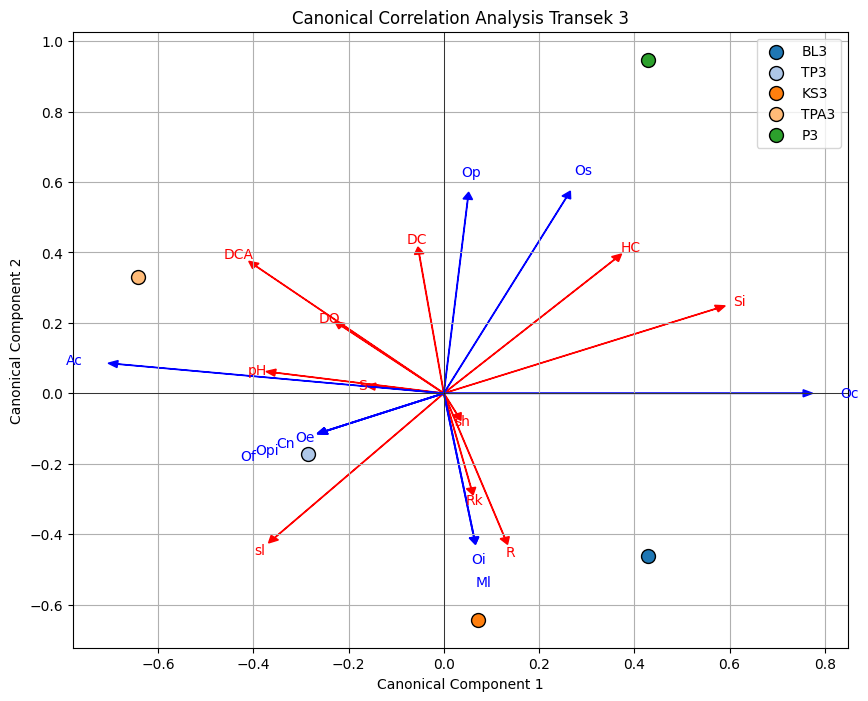

In [ ]:
fig, ax = plt.subplots(figsize=(10, 8))

offset_text_red = 1.05
offset_text_blue = 1.1
offset_text_diff1 = 1.25
offset_text_diff2 = 1.4
offset_text_diff3 = 1.55

# Plot vektor untuk parameter fisik dan substrat
for i, param in enumerate(parameters):
    end_x = cca.x_loadings_[i, 0]
    end_y = cca.x_loadings_[i, 1]

    ax.arrow(0, 0, end_x, end_y,
             head_width=0.02, head_length=0.02, fc='red', ec='red', length_includes_head=True)

    text_x = end_x * offset_text_red
    text_y = end_y * offset_text_red

    ax.text(text_x, text_y, param, color='red', ha='center', va='center')

# Plot spesies sebagai vektor dari pusat
for i, spc in enumerate(species):
    spc_col_index = df_encoded.columns.get_loc(f"{spc}")
    spc_y_index = spc_col_index - len(X[0])

    end_x = cca.y_loadings_[spc_y_index, 0]
    end_y = cca.y_loadings_[spc_y_index, 1]

    ax.arrow(0, 0, end_x, end_y,
             head_width=0.02, head_length=0.02, fc='blue', ec='blue', length_includes_head=True)

    if spc in ["Cn", "Ml"]:
        text_x = end_x * offset_text_diff1
        text_y = end_y * offset_text_diff1
    elif spc in["Opi"]:
        text_x = end_x * offset_text_diff2
        text_y = end_y * offset_text_diff2
    elif spc in["Of"]:
        text_x = end_x * offset_text_diff3
        text_y = end_y * offset_text_diff3
    else:
        text_x = end_x * offset_text_blue
        text_y = end_y * offset_text_blue

    ax.text(text_x, text_y, spc, color='blue', ha='center', va='center')

# Menghitung dan memplot pusat untuk setiap lokasi
for i, loc in enumerate(locations):
    loc_mask = df['Lokasi'] == loc
    loc_data = df[loc_mask]
    print(loc_data)
    loc_center = [loc_data['CCA1']/3, loc_data['CCA2']/3]
    ax.scatter(loc_center[0], loc_center[1], edgecolors='black', facecolors=colors[i % len(colors)], label=loc, s=100)

ax.axhline(0, color='black', linewidth=0.5)
ax.axvline(0, color='black', linewidth=0.5)
ax.set_xlabel('Canonical Component 1')
ax.set_ylabel('Canonical Component 2')
ax.set_title('Canonical Correlation Analysis Transek 3')
ax.legend()
plt.grid(True)
plt.show()

  Lokasi    sh  sl    pH    DO    DC    HC   DCA      S    Si  ...  Oi  Op  \
0    BL2  29.5  34  7.08  7.11  0.48  7.71  8.29  32.48  1.33  ...   3   5   

   Ac  Ll  Ml  Oa  Os  Of      CCA1      CCA2  
0   1   1  14   3   7   0  0.224052 -2.828174  

[1 rows x 27 columns]
  Lokasi    sh  sl    pH    DO    DC     HC    DCA      S   Si  ...  Oi  Op  \
1    TP2  31.0  34  7.45  7.13  0.26  11.79  23.72  16.92  0.0  ...   0   4   

   Ac  Ll  Ml  Oa  Os  Of      CCA1      CCA2  
1   2   0   0   1   4   2 -1.456337  0.193235  

[1 rows x 27 columns]
  Lokasi    sh  sl    pH   DO   DC   HC   DCA      S   Si  ...  Oi  Op  Ac  \
2    KS2  33.9  34  7.39  7.5  4.0  7.5  5.17  13.67  0.0  ...   1   7   0   

   Ll  Ml  Oa  Os  Of      CCA1     CCA2  
2   3   4   0   0   0  0.224052  1.05077  

[1 rows x 27 columns]
  Lokasi    sh  sl   pH    DO    DC    HC    DCA      S   Si  ...  Oi  Op  Ac  \
3   TPA2  31.0  34  7.3  7.21  7.78  5.56  25.56  33.61  0.0  ...   0   3   0   

   Ll  Ml  Oa  Os

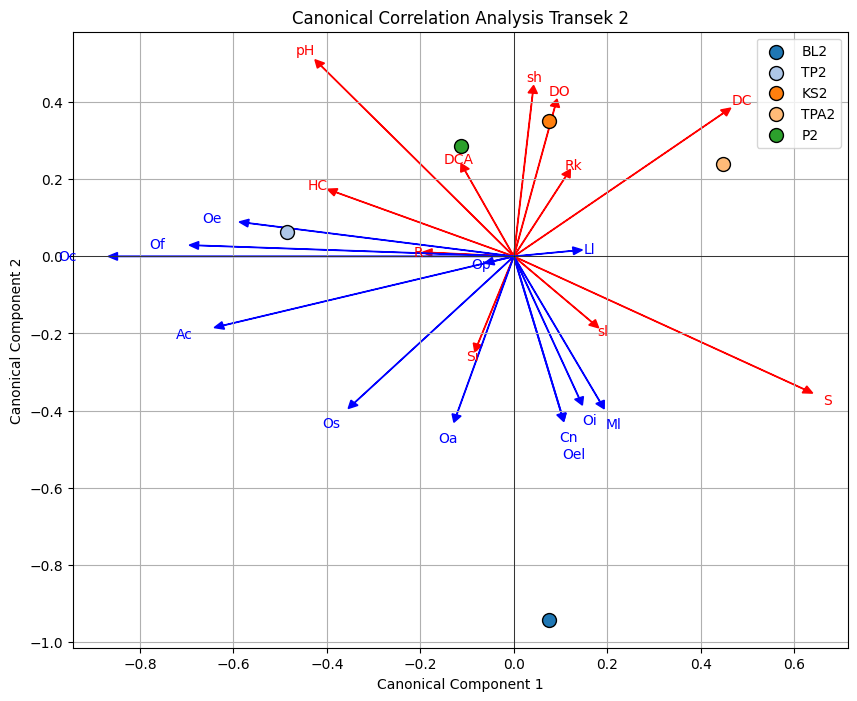

In [ ]:
fig, ax = plt.subplots(figsize=(10, 8))

offset_text_red = 1.05
offset_text_blue = 1.1
offset_text_diff1 = 1.2

# Plot vektor untuk parameter fisik dan substrat
for i, param in enumerate(parameters):
    end_x = cca.x_loadings_[i, 0]
    end_y = cca.x_loadings_[i, 1]

    ax.arrow(0, 0, end_x, end_y,
             head_width=0.02, head_length=0.02, fc='red', ec='red', length_includes_head=True)

    text_x = end_x * offset_text_red
    text_y = end_y * offset_text_red

    ax.text(text_x, text_y, param, color='red', ha='center', va='center')

# Plot spesies sebagai vektor dari pusat
for i, spc in enumerate(species):
    spc_col_index = df_encoded.columns.get_loc(f"{spc}")
    spc_y_index = spc_col_index - len(X[0])

    end_x = cca.y_loadings_[spc_y_index, 0]
    end_y = cca.y_loadings_[spc_y_index, 1]

    ax.arrow(0, 0, end_x, end_y,
             head_width=0.02, head_length=0.02, fc='blue', ec='blue', length_includes_head=True)

    if spc in ["Oel"]:
        text_x = end_x * offset_text_diff1
        text_y = end_y * offset_text_diff1
    else:
        text_x = end_x * offset_text_blue
        text_y = end_y * offset_text_blue

    ax.text(text_x, text_y, spc, color='blue', ha='center', va='center')

# Menghitung dan memplot pusat untuk setiap lokasi
for i, loc in enumerate(locations):
    loc_mask = df['Lokasi'] == loc
    loc_data = df[loc_mask]
    print(loc_data)
    loc_center = [loc_data['CCA1']/3, loc_data['CCA2']/3]
    ax.scatter(loc_center[0], loc_center[1], edgecolors='black', facecolors=colors[i % len(colors)], label=loc, s=100)

ax.axhline(0, color='black', linewidth=0.5)
ax.axvline(0, color='black', linewidth=0.5)
ax.set_xlabel('Canonical Component 1')
ax.set_ylabel('Canonical Component 2')
ax.set_title('Canonical Correlation Analysis Transek 2')
ax.legend()
plt.grid(True)
plt.show()

  Lokasi    sh  sl    pH    DO    DC    HC   DCA      S    Si  ...  Op  Ac  \
0    BL1  29.5  34  7.08  7.09  0.48  7.71  8.29  32.48  1.33  ...   5   1   

   Ll  Ml  Lg  Oa  Os  Of      CCA1      CCA2  
0   1   0   0   0   0   0 -2.635157 -0.827324  

[1 rows x 29 columns]
  Lokasi    sh  sl    pH    DO    DC     HC    DCA      S   Si  ...  Op  Ac  \
1    TP1  31.0  34  7.44  7.05  0.26  11.79  23.72  16.92  0.0  ...   0   0   

   Ll  Ml  Lg  Oa  Os  Of     CCA1      CCA2  
1   0   5   0   1   2   2  1.20778 -1.034155  

[1 rows x 29 columns]
  Lokasi    sh  sl    pH    DO   DC   HC   DCA      S   Si  ...  Op  Ac  Ll  \
2    KS1  33.9  34  7.42  7.55  4.0  7.5  5.17  13.67  0.0  ...   5   0   0   

   Ml  Lg  Oa  Os  Of     CCA1      CCA2  
2   9   2   0   0   0  1.20778 -1.034155  

[1 rows x 29 columns]
  Lokasi    sh  sl   pH    DO    DC    HC    DCA      S   Si  ...  Op  Ac  Ll  \
3   TPA1  31.0  34  7.3  7.02  7.78  5.56  25.56  33.61  0.0  ...  10   0   0   

   Ml  Lg  Oa  Os

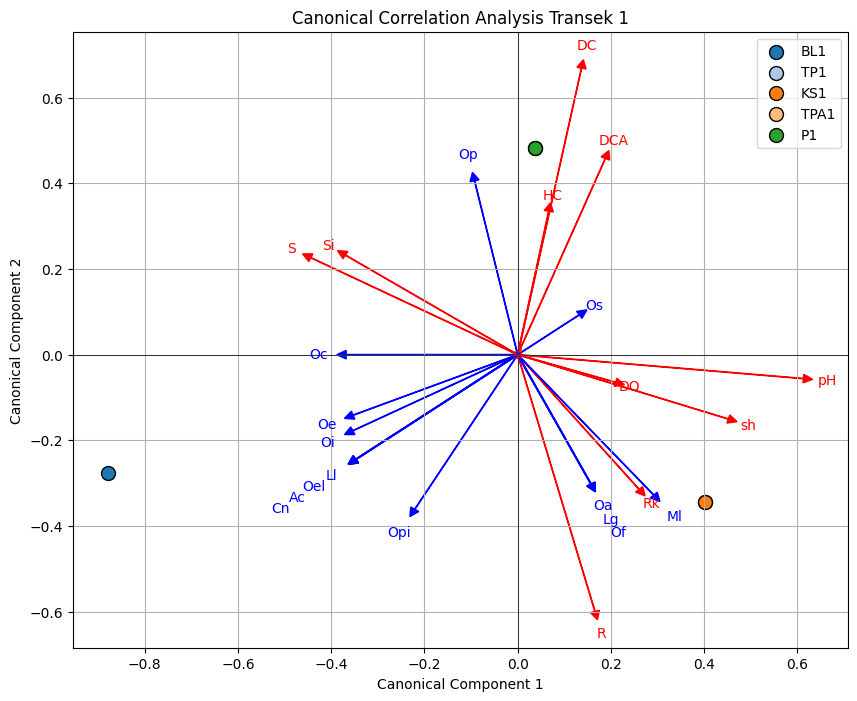

In [ ]:
fig, ax = plt.subplots(figsize=(10, 8))

offset_text_red = 1.05
offset_text_blue = 1.1
offset_text_diff1 = 1.2
offset_text_diff2 = 1.3
offset_text_diff3 = 1.4

# Plot vektor untuk parameter fisik dan substrat
for i, param in enumerate(parameters):
    end_x = cca.x_loadings_[i, 0]
    end_y = cca.x_loadings_[i, 1]

    ax.arrow(0, 0, end_x, end_y,
             head_width=0.02, head_length=0.02, fc='red', ec='red', length_includes_head=True)

    text_x = end_x * offset_text_red
    text_y = end_y * offset_text_red

    ax.text(text_x, text_y, param, color='red', ha='center', va='center')

# Plot spesies sebagai vektor dari pusat
for i, spc in enumerate(species):
    spc_col_index = df_encoded.columns.get_loc(f"{spc}")
    spc_y_index = spc_col_index - len(X[0])

    end_x = cca.y_loadings_[spc_y_index, 0]
    end_y = cca.y_loadings_[spc_y_index, 1]

    ax.arrow(0, 0, end_x, end_y,
             head_width=0.02, head_length=0.02, fc='blue', ec='blue', length_includes_head=True)

    if spc in ["Oel", "Lg"]:
        text_x = end_x * offset_text_diff1
        text_y = end_y * offset_text_diff1
    elif spc in["Ac", "Of"]:
        text_x = end_x * offset_text_diff2
        text_y = end_y * offset_text_diff2
    elif spc in["Cn"]:
        text_x = end_x * offset_text_diff3
        text_y = end_y * offset_text_diff3
    else:
        text_x = end_x * offset_text_blue
        text_y = end_y * offset_text_blue

    ax.text(text_x, text_y, spc, color='blue', ha='center', va='center')

# Menghitung dan memplot pusat untuk setiap lokasi
for i, loc in enumerate(locations):
    loc_mask = df['Lokasi'] == loc
    loc_data = df[loc_mask]
    print(loc_data)
    loc_center = [loc_data['CCA1']/3, loc_data['CCA2']/3]
    ax.scatter(loc_center[0], loc_center[1], edgecolors='black', facecolors=colors[i % len(colors)], label=loc, s=100)

ax.axhline(0, color='black', linewidth=0.5)
ax.axvline(0, color='black', linewidth=0.5)
ax.set_xlabel('Canonical Component 1')
ax.set_ylabel('Canonical Component 2')
ax.set_title('Canonical Correlation Analysis Transek 1')
ax.legend()
plt.grid(True)
plt.show()